## DECISION TREE CAR EVOLUTION ##

In [5]:
#import library yang dibutuhkan

import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [6]:
#membaca dataset 

dataset = pd.read_csv("car_evaluation.csv")
dataset

,vhigh,vhigh.1,2,2.1,small,low,unacc
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc
...,...,...,...,...,...,...,...
1722,low,low,5more,more,med,med,good
1723,low,low,5more,more,med,high,vgood
1724,low,low,5more,more,big,low,unacc
1725,low,low,5more,more,big,med,good


In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1727 entries, 0 to 1726
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   vhigh    1727 non-null   object
 1   vhigh.1  1727 non-null   object
 2   2        1727 non-null   object
 3   2.1      1727 non-null   object
 4   small    1727 non-null   object
 5   low      1727 non-null   object
 6   unacc    1727 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [9]:
#mengganti nama kolom agar lebih mudah dibaca

dataset.columns = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']
dataset

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc
...,...,...,...,...,...,...,...
1722,low,low,5more,more,med,med,good
1723,low,low,5more,more,med,high,vgood
1724,low,low,5more,more,big,low,unacc
1725,low,low,5more,more,big,med,good


In [10]:
#mengubah data kategorikal menjadi numerik

encoders = {}
for column in dataset.columns:
    le = LabelEncoder()
    dataset[column] = le.fit_transform(dataset[column])
    encoders[column] = le
dataset

,buying,maint,doors,persons,lug_boot,safety,class
0,3,3,0,0,2,2,2
1,3,3,0,0,2,0,2
2,3,3,0,0,1,1,2
3,3,3,0,0,1,2,2
4,3,3,0,0,1,0,2
...,...,...,...,...,...,...,...
1722,1,1,3,2,1,2,1
1723,1,1,3,2,1,0,3
1724,1,1,3,2,0,1,2
1725,1,1,3,2,0,2,1


In [24]:
#menampilkan 5 teratas data

dataset.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,3,3,0,0,2,2,2
1,3,3,0,0,2,0,2
2,3,3,0,0,1,1,2
3,3,3,0,0,1,2,2
4,3,3,0,0,1,0,2


In [12]:
#memisahkan fitur dan label, kemudian split menjadi train dan test

x = dataset.drop('class', axis=1)
y = dataset['class']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [13]:
#membuat dan melatih model decision tree

model = DecisionTreeClassifier(random_state=42)
model.fit(x_train, y_train)

DecisionTreeClassifier(random_state=42)

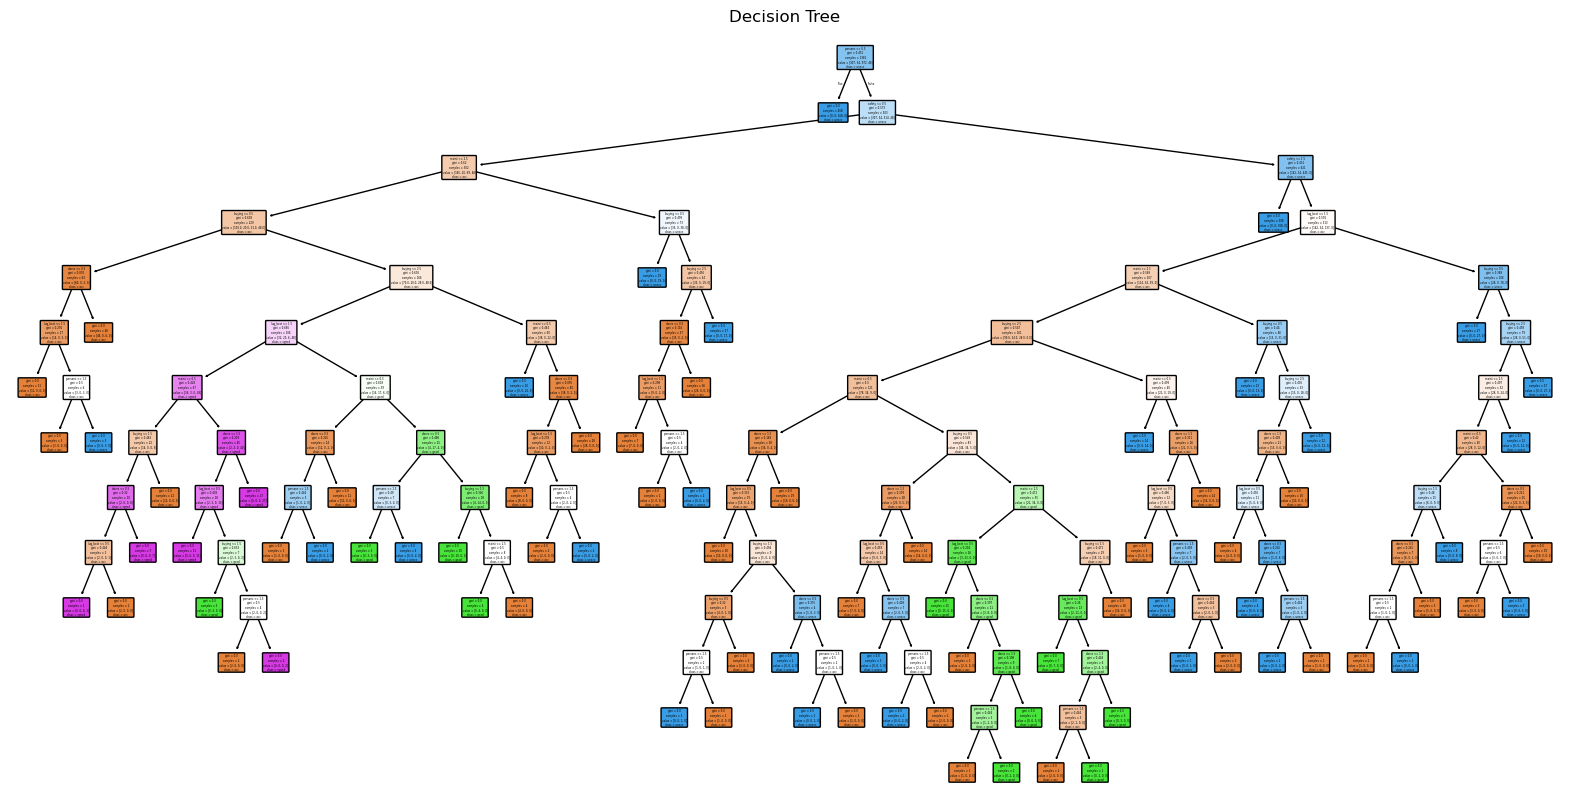

In [17]:
#visualisasi Decision Tree

plt.figure(figsize=(20, 10))
plot_tree(model, feature_names=x.columns, class_names=encoders['class'].classes_, filled=True, rounded=True)
plt.title("Decision Tree")
plt.show()

In [23]:
#melatih model dengan kedalaman terbatas agar visualisasi lebih ringkas

model_simple = DecisionTreeClassifier(random_state=42, max_depth=5)
model_simple.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=42)

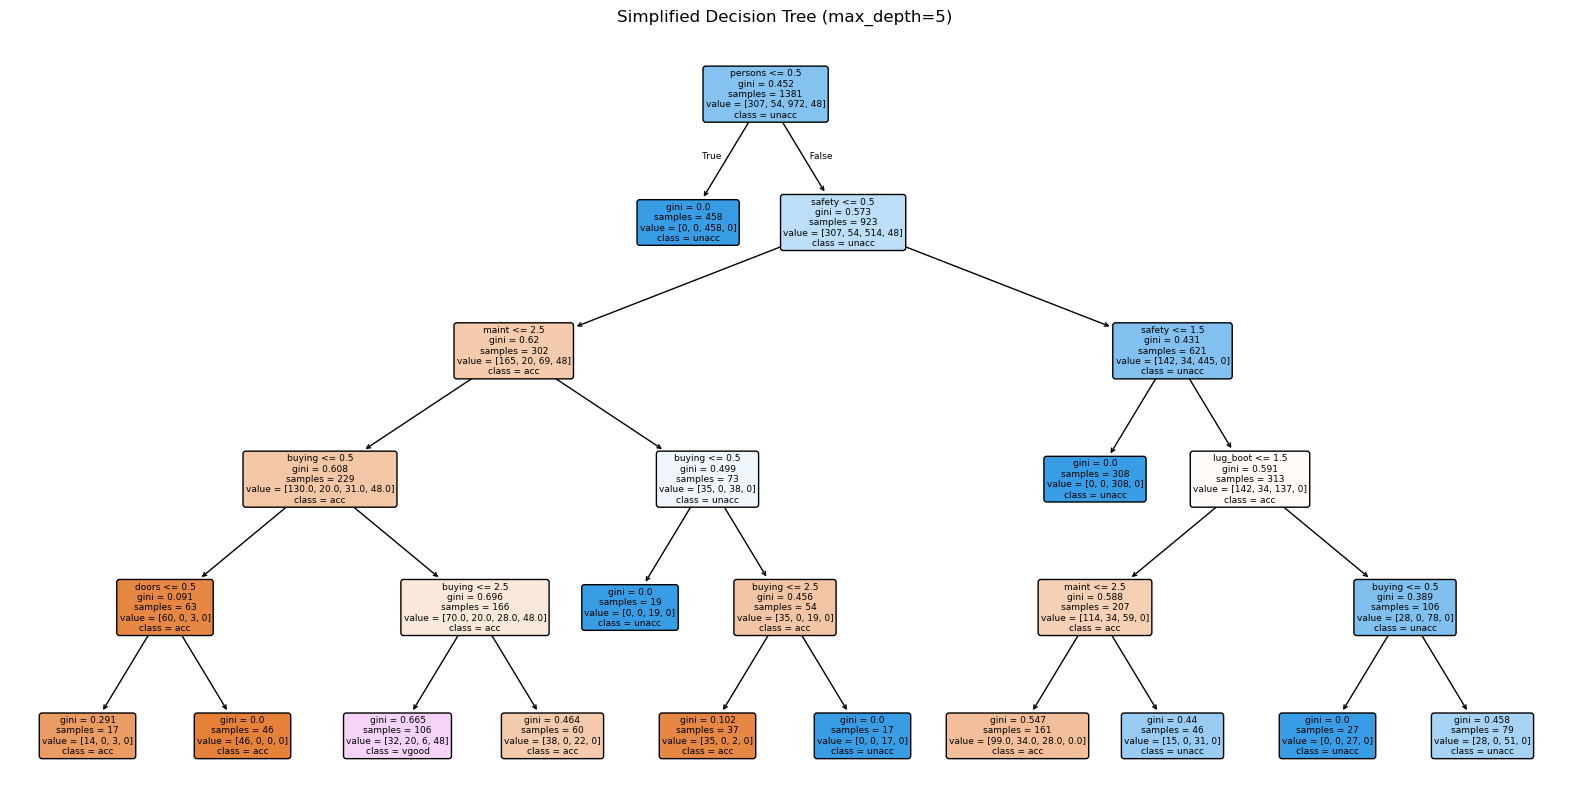

In [22]:
#visualisasi dengan max_depth=5

plt.figure(figsize=(20, 10))
plot_tree(model_simple, feature_names=x.columns, class_names=encoders['class'].classes_,
          filled=True, rounded=True)
plt.title("Simplified Decision Tree (max_depth=5)")
plt.show()

In [21]:
#evaluasi akurasi

y_pred = model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Akurasi: {accuracy * 100:.2f}%")

Akurasi: 97.11%
